In [69]:
!git clone https://github.com/CSE-151A-Group-Wildfire/CSE-151A-Project.git

fatal: destination path 'CSE-151A-Project' already exists and is not an empty directory.


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing

In [72]:
weather = pd.read_csv('CSE-151A-Project/weather.csv')

<ipython-input-72-6e86225cef77>:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('CSE-151A-Project/weather.csv')


In [73]:
print(weather.columns)

Index(['Date', 'Time', 'date_time', 'altimeter', 'air_temp',
       'relative_humidity', 'wind_speed', 'sea_level_pressure',
       'weather_cond_code', 'visibility', 'wind_direction',
       'precip_accum_three_hour', 'wind_gust', 'precip_accum_one_hour',
       'pressure_tendency', 'cloud_layer_1_code', 'cloud_layer_2_code',
       'cloud_layer_3_code', 'precip_accum_six_hour', 'precip_accum_24_hour',
       'pressure_change_code', 'air_temp_high_6_hour', 'air_temp_low_6_hour',
       'peak_wind_speed', 'air_temp_high_24_hour', 'air_temp_low_24_hour',
       'ceiling', 'dew_point_temperature', 'peak_wind_direction', 'metar',
       'metar_origin', 'pressure', 'Unnamed: 32', 'wet_bulb_temp',
       'wind_cardinal_direction', 'weather_condition', 'weather_summary',
       'cloud_layer_1', 'cloud_layer_2', 'cloud_layer_3', 'wind_chill',
       'Unnamed: 41', 'heat_index'],
      dtype='object')


In [74]:
weather.shape

(261079, 43)

Droping unnecessary columns

In [75]:
dropped_list = ['Unnamed: 32', 'Unnamed: 41', 'metar', 'metar_origin', 'pressure_change_code',
                   'weather_cond_code', 'pressure_change_code', 'visibility',
                   'cloud_layer_1', 'cloud_layer_2', 'cloud_layer_3',
                   'wind_cardinal_direction', 'cloud_layer_1_code',
                   'cloud_layer_2_code', 'cloud_layer_3_code', 'heat_index']
weather = weather.drop(columns= dropped_list)

Making sure the "air_temp" column doesn't have any missing values

In [76]:
weather = weather.dropna(subset=['air_temp'])

Filling in the missing values only in numeric columns with their mean

In [77]:
number_columns = list(weather.select_dtypes(include=[np.number]).columns)
weather[number_columns] = weather[number_columns].fillna(weather[number_columns].mean())

Convert 'air_temp' to numeric if it's not already

In [78]:
weather['air_temp'] = pd.to_numeric(weather['air_temp'], errors='coerce')

<ipython-input-78-9fa950945819>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['air_temp'] = pd.to_numeric(weather['air_temp'], errors='coerce')


Extract date and time components

In [79]:
weather['date_time'] = pd.to_datetime(weather['date_time'])
weather['year'] = weather['date_time'].dt.year
weather['month'] = weather['date_time'].dt.month
weather['day'] = weather['date_time'].dt.day
weather['hour'] = weather['date_time'].dt.hour

<ipython-input-79-c18c257407a8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather['date_time'] = pd.to_datetime(weather['date_time'])


Calculate hourly average temperature

In [80]:
hourly_avg_temp = weather.groupby(['year', 'month', 'day', 'hour'])['air_temp'].mean().reset_index()
hourly_avg_temp.rename(columns={'air_temp': 'hourly_avg_temp'}, inplace=True)

Yearly Average Temperature Change

In [81]:
yearly_avg_temp = weather.groupby(['year'])['air_temp'].mean().reset_index()
yearly_avg_temp.rename(columns={'air_temp': 'year'}, inplace=True)

Calculate monthly average precipitation

In [82]:
weather['precip_accum_three_hour'] = pd.to_numeric(weather['precip_accum_three_hour'], errors='coerce')
weather_clean = weather.dropna(subset=['precip_accum_three_hour'])
yearly_avg_precip = weather_clean.groupby(['year'])['precip_accum_three_hour'].mean().reset_index()
yearly_avg_precip

,year,precip_accum_three_hour
0,2000.0,0.508222
1,2001.0,0.117647
2,2002.0,0.055854
3,2003.0,0.060308
4,2004.0,0.156604
5,2005.0,0.123086
6,2006.0,0.071375
7,2007.0,0.043800
8,2008.0,0.018348
9,2009.0,0.120040


Text(0, 0.5, 'precip_accum_three_hour')

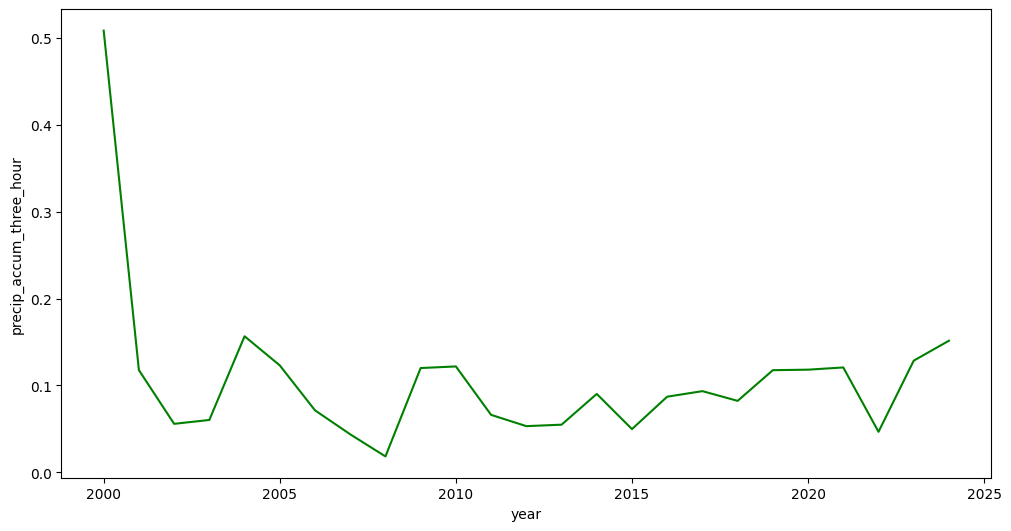

In [83]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = yearly_avg_precip.sort_values('year', ascending=True)

plt.plot(df_sorted['year'], df_sorted['precip_accum_three_hour'], color='g')
plt.xlabel('year')
plt.ylabel('precip_accum_three_hour')

Average yearly temperature

In [84]:
weather_clean = weather.dropna(subset=['air_temp'])
yearly_avg_temp = weather_clean.groupby(['year'])['air_temp'].mean().reset_index()
yearly_avg_temp

,year,air_temp
0,2000.0,62.788479
1,2001.0,61.967393
2,2002.0,62.190844
3,2003.0,63.404508
4,2004.0,63.155874
5,2005.0,62.670087
6,2006.0,64.363523
7,2007.0,63.233413
8,2008.0,63.786794
9,2009.0,63.916446


Text(0, 0.5, 'precip_accum_three_hour')

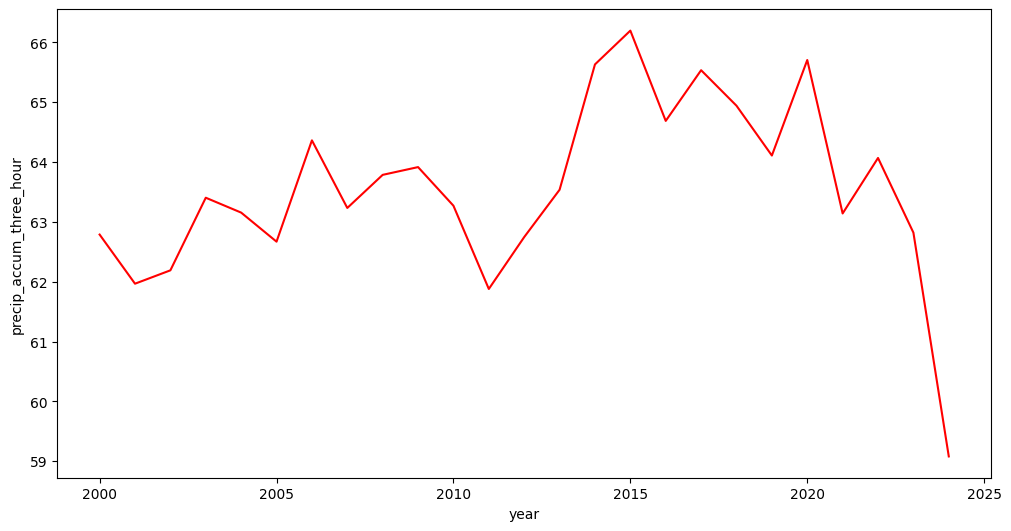

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = yearly_avg_temp.sort_values('year', ascending=True)

plt.plot(df_sorted['year'], df_sorted['air_temp'], color='r')
plt.xlabel('year')
plt.ylabel('precip_accum_three_hour')

# Merge the monthly average temperature back into the original dataset

In [86]:
avg_weather_df = pd.merge(weather, hourly_avg_temp, on=['year', 'month', 'day', 'hour'], how='left')

# Scatter Plot

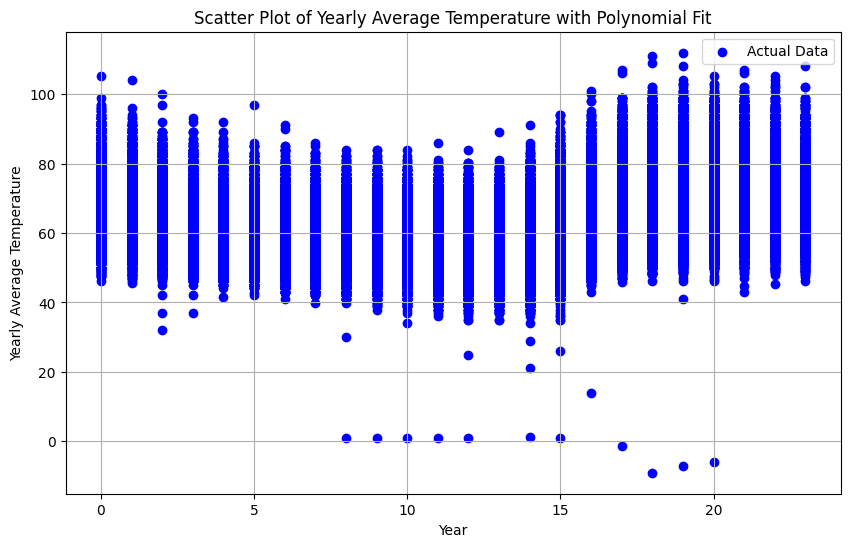

In [87]:
## Scatter Plot Graph
plt.figure(figsize=(10, 6))
plt.scatter(hourly_avg_temp['hour'], hourly_avg_temp['hourly_avg_temp'], color='blue', label='Actual Data')

plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')
plt.title('Scatter Plot of Yearly Average Temperature with Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()

# Pairplot

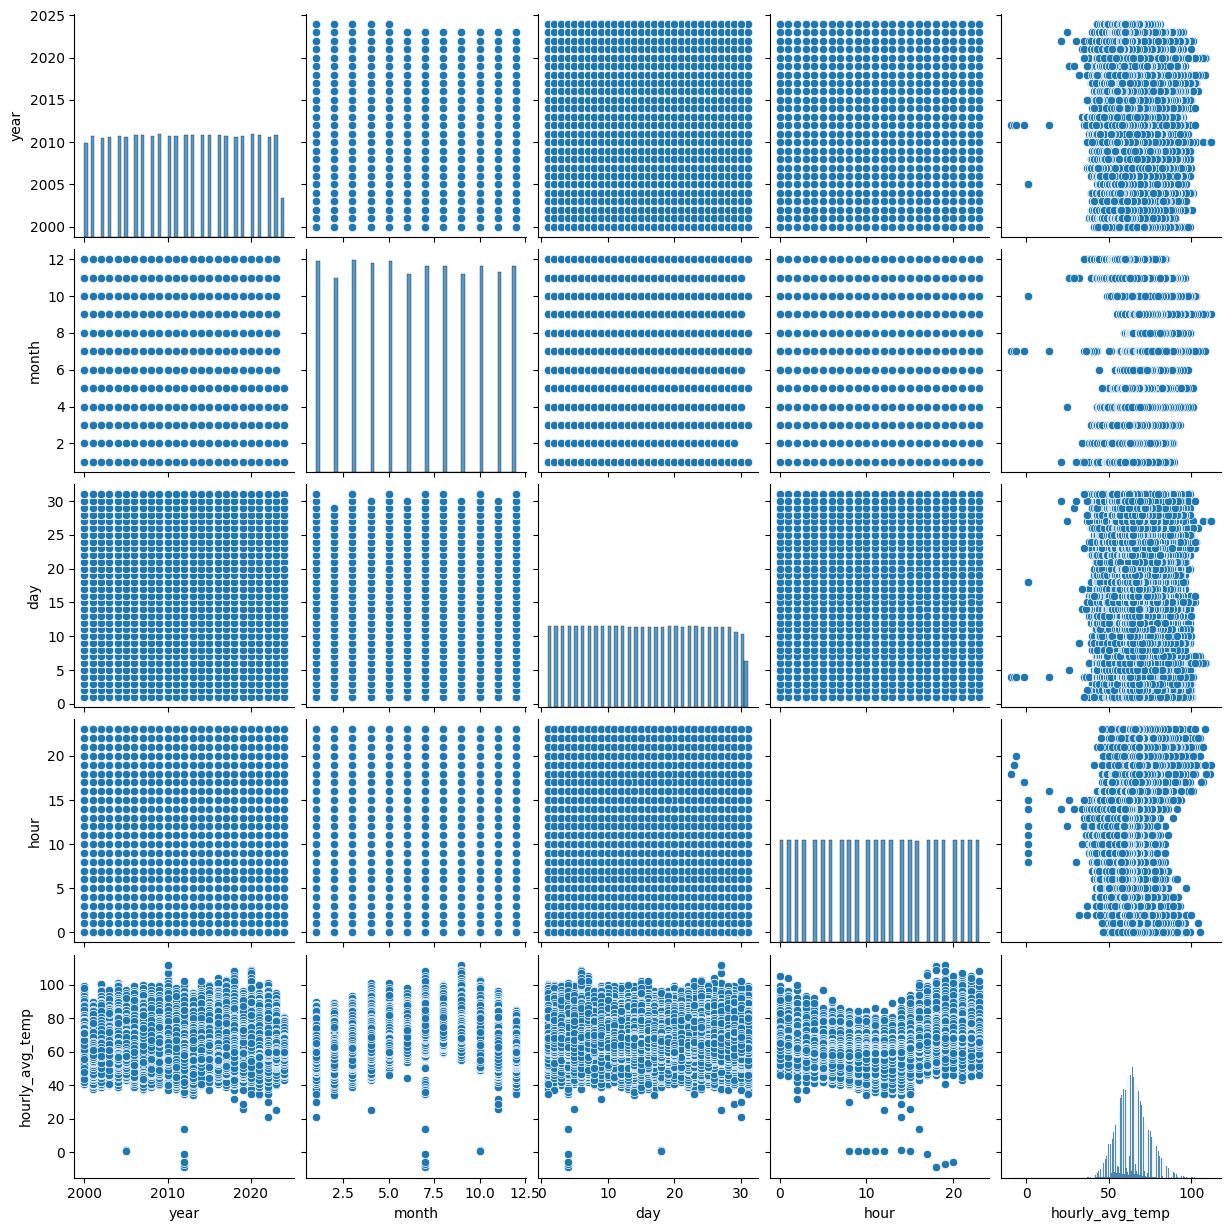

In [88]:
sns.pairplot(hourly_avg_temp)
plt.show()

# Correlation Matrix

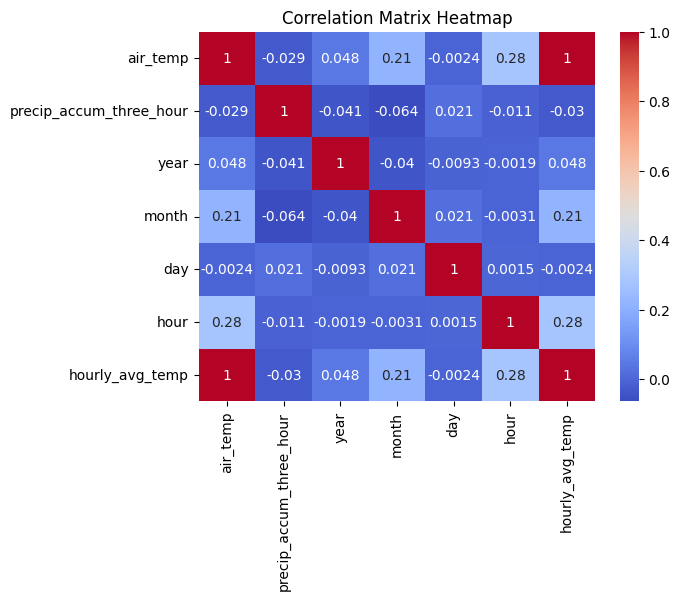

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Correlation Matrix
numeric_df = avg_weather_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Regression Model


Mean Squared Error: 68.95303405210662
R^2 Score: 0.1313592325485371


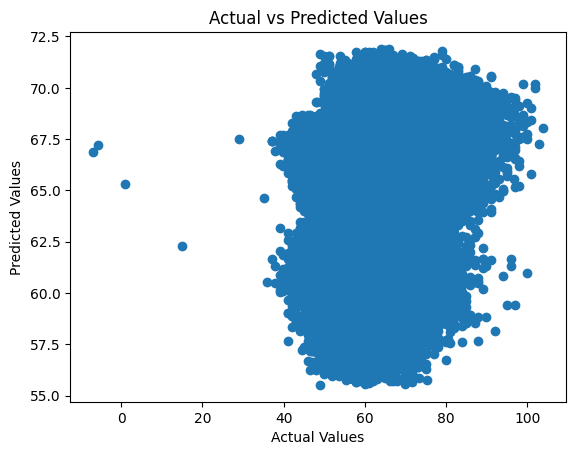

In [90]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


features = ['hour', 'day' ,'month', 'year']
target = 'air_temp'

X = avg_weather_df[features]
y = avg_weather_df[target]

# Handle Missing Values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Yearly Average Temperature Over Time Model

     year  yearly_avg_temp
0  2000.0        62.788479
1  2001.0        61.967393
2  2002.0        62.190844
3  2003.0        63.404508
4  2004.0        63.155874


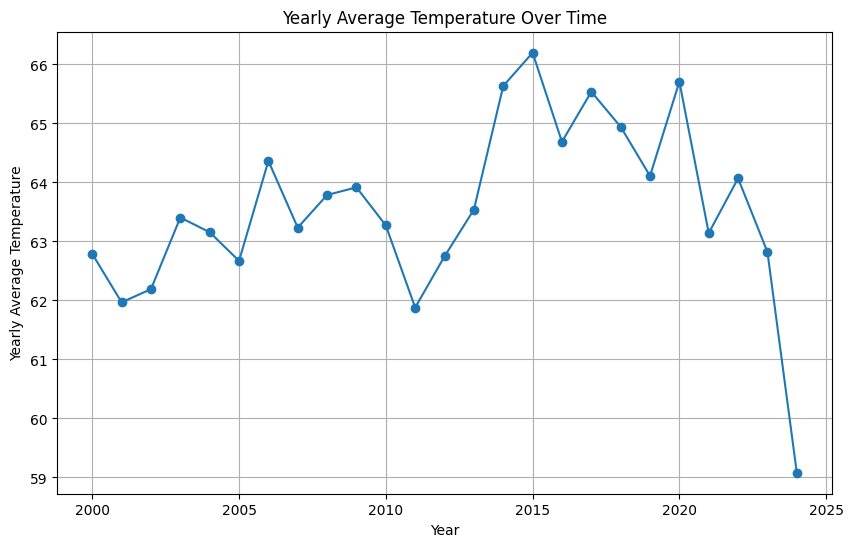

In [91]:
hourly_avg_temp_1 = hourly_avg_temp.rename(columns={'year': 'avg_temp_year', 'month': 'avg_temp_month'})

# Convert date_time to datetime format
avg_weather_df['date_time'] = pd.to_datetime(avg_weather_df['date_time'])

# Calculate the yearly average temperature
yearly_avg_temp = avg_weather_df.groupby('year')['air_temp'].mean().reset_index()
yearly_avg_temp.columns = ['year', 'yearly_avg_temp']

print(yearly_avg_temp.head())

# Plot the Yearly Average Temperatures
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp['year'], yearly_avg_temp['yearly_avg_temp'], marker='o')
plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')
plt.title('Yearly Average Temperature Over Time')
plt.grid(True)
plt.show()



# Splitting Data and Training Linear Regression

In [92]:
# Define Features and Target
X = hourly_avg_temp[['year']]
y = hourly_avg_temp['hourly_avg_temp']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 85.86762036980271
R^2 Score: 0.003191183769567507


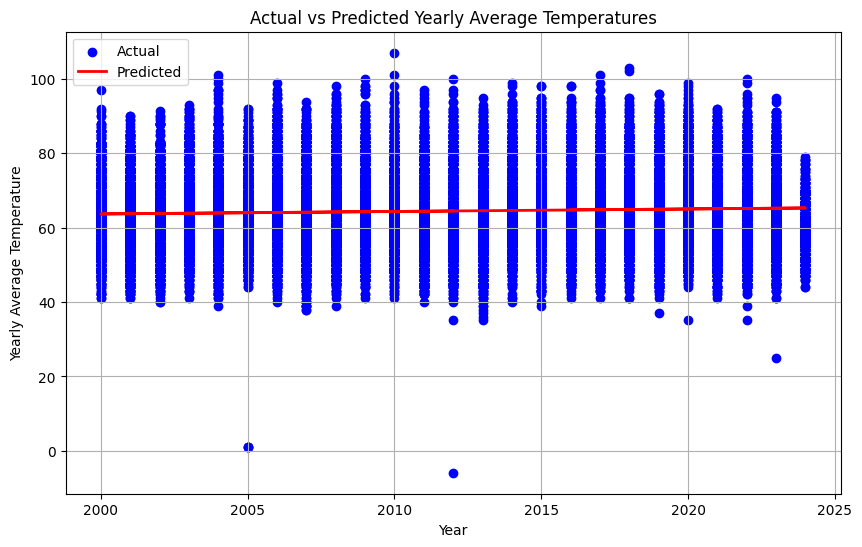

In [93]:
# Plot Actual vs Predicted Yearly Average Temperatures
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')
plt.title('Actual vs Predicted Yearly Average Temperatures')
plt.legend()
plt.grid(True)
plt.show()


# Encoding and Normalization

In [94]:
from sklearn.preprocessing import MinMaxScaler

hour_column = hourly_avg_temp['hour']
features = hourly_avg_temp[['hourly_avg_temp']]

scaler = MinMaxScaler()
normalized = scaler.fit_transform(features)

processed_df = pd.DataFrame(normalized, columns=features.columns)

final_df = pd.concat([hour_column, processed_df], axis=1)
final_df

,hour,hourly_avg_temp
0,21.0,0.611276
1,22.0,0.595569
2,1.0,0.545966
3,2.0,0.536872
4,3.0,0.521164
...,...,...
209557,10.0,0.562500
209558,11.0,0.562500
209559,12.0,0.562500
209560,13.0,0.571429


## Neural Network

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


5302/5305 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 5.8940e-06

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


5305/5305 [==============================] - 13s 2ms/step - loss: 0.0000e+00 - accuracy: 5.8912e-06 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
5305/5305 [==============================] - 11s 2ms/step - loss: 0.0000e+00 - accuracy: 5.8912e-06 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
5305/5305 [==============================] - 9s 2ms/step - loss: 0.0000e+00 - accuracy: 5.8912e-06 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
5305/5305 [==============================] - 11s 2ms/step - loss: 0.0000e+00 - accuracy: 5.8912e-06 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
5305/5305 [==============================] - 11s 2ms/step - loss: 0.0000e+00 - accuracy: 5.8912e-06 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
5305/5305 [==============================] - 10s 2ms/step - loss: 0.0000e+00 - accuracy: 5.8912e-06 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
5305/5305 [==================

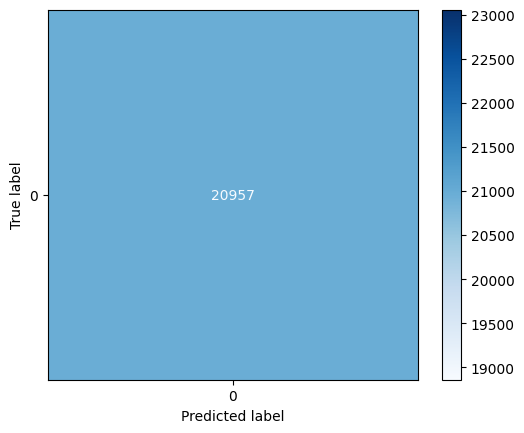

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score, ConfusionMatrixDisplay

# Prepare input features (X) and target labels (y)
X = processed_df
y = final_df[['hourly_avg_temp']]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='sigmoid'))  # Input layer
model.add(Dense(12, activation='sigmoid'))  # Hidden layer 1
model.add(Dense(12, activation='sigmoid'))  # Hidden layer 2
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
model.summary()

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()